In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
file_path = '/content/Obesity.csv'
df = pd.read_csv(file_path)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


Checking for Missing Values

In [3]:
df.isnull().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


eda for analysing missing

<ipython-input-6-282754c72ca8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Count', y='Column', data=missing_data, palette='viridis')


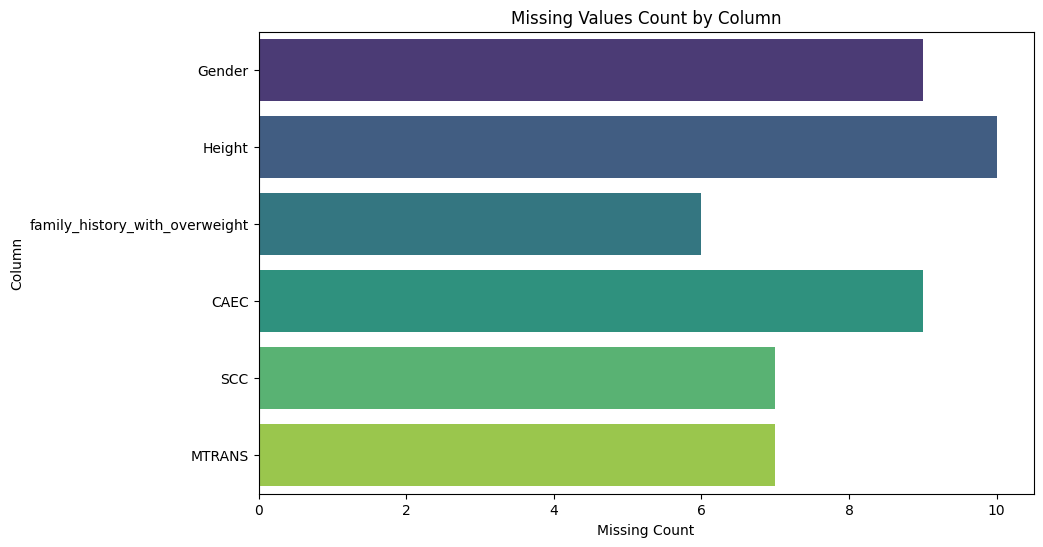

In [6]:
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Count']
missing_data = missing_data[missing_data['Missing Count'] > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Column', data=missing_data, palette='viridis')
plt.title('Missing Values Count by Column')
plt.show()

FILLING NUMERIC MISSING VALUE WITH MEAN

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())



FILLING CATEGROGICAL COLUMN MISSING VALUE WITH MODE


In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))



In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [11]:
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [13]:

#  Checking for Duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of Duplicate Rows: {duplicate_rows.shape[0]}")


Number of Duplicate Rows: 23


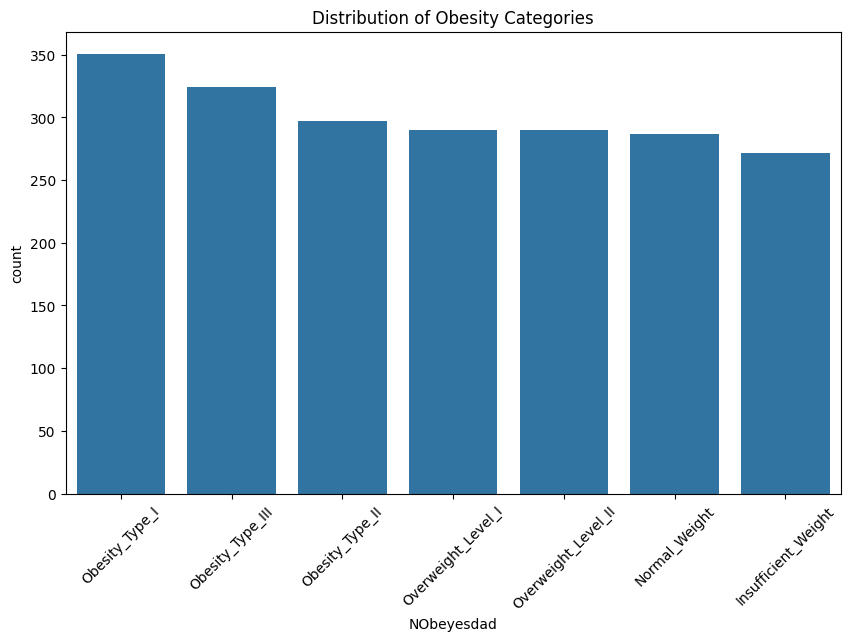

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Categories')
plt.show()

plotting corelllation matrix for feature understanding


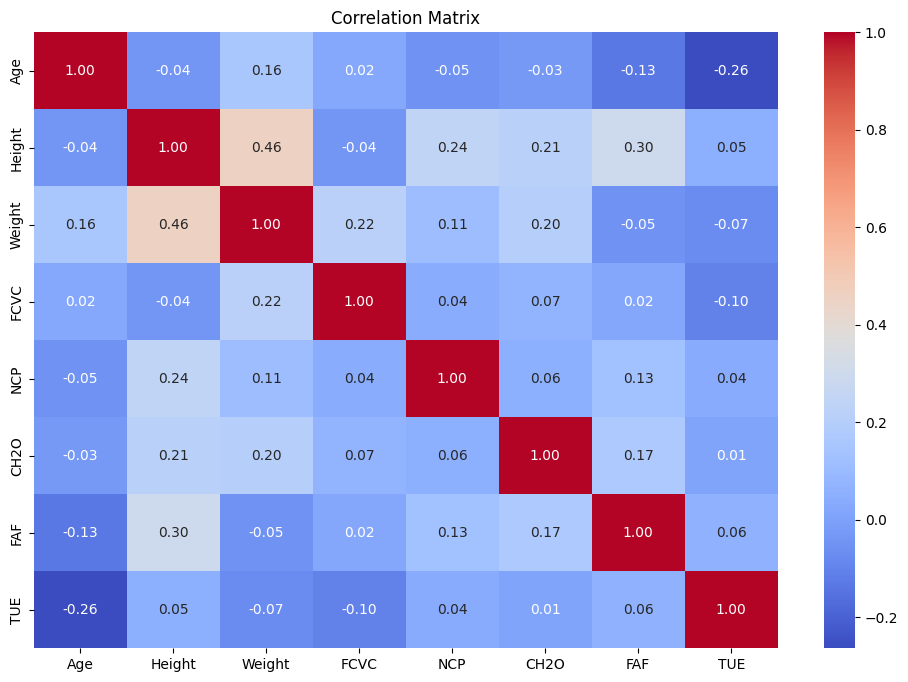

In [16]:
# Correlation matrix of numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f") #
plt.title('Correlation Matrix')
plt.show()

CHECKING FOR DUPLICATE ROWS


In [17]:
duplicate_rows = df[df.duplicated()]
print(f"Number of Duplicate Rows: {duplicate_rows.shape[0]}")

Number of Duplicate Rows: 23


REMOVING DUPLICATE ROWS

In [18]:

df = df.drop_duplicates()

preprocessing

In [20]:

from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

<ipython-input-21-c313647e8655>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-21-c313647e8655>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-21-c313647e8655>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [23]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [24]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [26]:
from sklearn.model_selection import train_test_split


In [27]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:

# Normalize/Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.model_selection import GridSearchCV

In [31]:


# Model Building: Use Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

#  doing hyperparameter tuning using Grid Search CV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from Grid Search
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


 Usingthe best model found by grid search to make predictions on the scaled test data and Predict the target variable for the test data using the best model


In [35]:


best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

We check the accuracy, classification report, and confusion matrix to evaluate the overall performance of the model on the test set, ensuring it reliably makes correct predictions and is effective at classifying instances into the correct categories.


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.78      0.95      0.86        61
           2       0.98      0.95      0.97        62
           3       1.00      0.98      0.99        62
           4       1.00      1.00      1.00        71
           5       0.88      0.84      0.86        51
           6       0.96      0.89      0.92        53

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418

Confusion Matrix:
 [[54  4  0  0  0  0  0]
 [ 0 58  0  0  0  3  0]
 [ 0  1 59  0  0  0  2]
 [ 0  0  1 61  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  8  0  0  0 43  0]
 [ 0  3  0  0  0  3 47]]
Accuracy Score: 0.9401913875598086


Retrieve the user input and create a DataFrame.

 Collect user input for all required features


In [66]:

full_column_names = {
    'Gender': 'Gender',
    'family_history_with_overweight': 'Family History with Overweight',
    'FAVC': 'Frequent Consumption of High-Calorie Food',
    'CAEC': 'Consumption of Food Between Meals',
    'SMOKE': 'Smoking',
    'SCC': 'SCC',
    'CALC': 'Caloric Intake',
    'MTRANS': 'Transportation to Work/School',
    'Age': 'Age',
    'CH2O': 'Daily Water Consumption',
    'FAF': 'Frequent Physical Activity',
    'FCVC': 'Frequency of Consumption of Vegetables',
    'Height': 'Height',
    'Weight': 'Weight',
    'NObeyesdad': 'Obesity Level'
}

def get_user_input():
    print("Please enter the following information:")
    user_input = {
        'Gender': input(f"{full_column_names['Gender']} (Male/Female): "),
        'family_history_with_overweight': input(f"{full_column_names['family_history_with_overweight']} (Yes/No): "),
        'FAVC': input(f"{full_column_names['FAVC']} (Yes/No): "),
        'CAEC': input(f"{full_column_names['CAEC']} (No/Some/Frequently): "),
        'SMOKE': input(f"{full_column_names['SMOKE']} (Yes/No): "),
        'SCC': input(f"{full_column_names['SCC']} (Yes/No): "),
        'CALC': input(f"{full_column_names['CALC']} (Yes/No): "),
        'MTRANS': input(f"{full_column_names['MTRANS']} (Public_Transportation/Automobile/Walking/Bike): "),
        'Age': input(f"{full_column_names['Age']} (e.g., 25): "),
        'CH2O': input(f"{full_column_names['CH2O']} (e.g., 2 for 2 liters): "),
        'FAF': input(f"{full_column_names['FAF']} (e.g., 4 for frequent): "),
        'FCVC': input(f"{full_column_names['FCVC']} (e.g., 3 for frequent): "),
        'Height': input(f"{full_column_names['Height']} (e.g., 170 for 170 cm): "),
        'Weight': input(f"{full_column_names['Weight']} (e.g., 70 for 70 kg): ")
    }
    return pd.DataFrame([user_input])

Retrieve the user input and create a DataFrame.

getting input from user


In [78]:
new_data = get_user_input()

Please enter the following information:
Gender (Male/Female): Male
Family History with Overweight (Yes/No): no
Frequent Consumption of High-Calorie Food (Yes/No): no
Consumption of Food Between Meals (No/Some/Frequently): Frequently
Smoking (Yes/No): no
SCC (Yes/No): no
Caloric Intake (Yes/No): yes
Transportation to Work/School (Public_Transportation/Automobile/Walking/Bike): Automobile
Age (e.g., 25): 34
Daily Water Consumption (e.g., 2 for 2 liters): 2
Frequent Physical Activity (e.g., 4 for frequent): 4
Frequency of Consumption of Vegetables (e.g., 3 for frequent): 3
Height (e.g., 170 for 170 cm): 164
Weight (e.g., 70 for 70 kg): 63


In [79]:


# Ensure that the DataFrame includes all features required by the model.
for column in X.columns:
    if column not in new_data.columns:
        new_data[column] = '0'  # Add default values if columns are missing

In [80]:


# Encode categorical variables
for column in categorical_columns:
    if column in new_data.columns:
        le = label_encoders[column]
        if new_data[column].iloc[0] in le.classes_:
            new_data[column] = le.transform(new_data[column])
        else:
            print(f"Warning: {new_data[column].iloc[0]} is not a valid value for {column}.")
            new_data[column] = le.transform([le.classes_[0]])

In [81]:


# Convert numeric features to appropriate types
numeric_columns = ['Age', 'CH2O', 'FAF', 'FCVC', 'Height', 'Weight']
new_data[numeric_columns] = new_data[numeric_columns].astype(float)

In [82]:


# Reorder columns to match the order used during fitting
new_data = new_data[X.columns]

In [83]:

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

In [84]:

# Predict using the best model
predictions = best_rf_model.predict(new_data_scaled)

In [85]:

# Decode the prediction back to the original class label
prediction_classes = label_encoders['NObeyesdad'].inverse_transform(predictions)

# Display predictions
print(f"Predicted Obesity Level: {prediction_classes[0]}")


Predicted Obesity Level: Normal_Weight


i have tried model with xgboost,catboost,lightgbm but i got good accuracy in random forest other model was taking more time to load my exam was 3 hours duration,in random forest i got good accuracy and good prediction

